In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### With 100 points, three cases:

1. Ideal
2. Gaussian noise
3. Uniform noise

we have created a dataset with 100 points. The relation we want to investigate is

$$
2.5382 cos(x)+x^2-0.5
$$

In [2]:
import numpy as np

X = 5 * np.random.randn(100,1)
a = 2 #weight for noise
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(100,1)
u = y + a*np.random.rand(100,1)

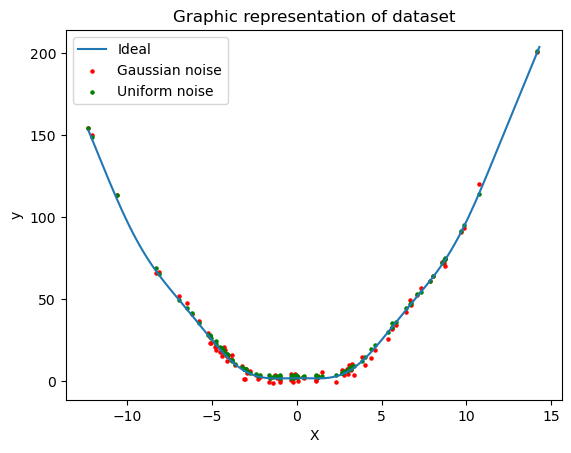

In [3]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='Ideal')
plt.scatter(X,n, label='Gaussian noise', s=5, color='r')
plt.scatter(X,u, label='Uniform noise', s=5, color='green')
plt.title('Graphic representation of dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    procs=8,
)

In [4]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "sin",
        "exp",
        "log",
    ],
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)    
    warm_start=True,
    turbo=True,
    #batching=True, not so useful for this example
)

## 1. Ideal


In [5]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/julia_helpers.py:208: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          26.318993   
	1         2.929221                                          (x0 * x0)   
	2         0.038765                           ((x0 * x0) + -0.5270287)   
	3         0.810438                              (cos(x0) + (x0 * x0))   
	4         0.905035                ((x0 * x0) + (cos(x0) * 2.5131142))   
	5         0.002604           ((x0 * x0) + (exp(0.9343726) * cos(x0)))   
	6         3.230011  (((x0 * x0) + (cos(x0) * 2.5131142)) + -0.4025...   
	7         0.711544  ((cos(x0) * 2.6027856) + ((x0 * x0) + (0.71464...   
	8         0.041608  ((cos(x0) * 2.6027856) + ((x0 * x0) + (0.71464...   
	9         0.327977  ((x0 * x0) + (((exp(cos(0.22354786)) + -0.0924...   
	10  >>>>  1.473487  ((x0 * x0) + (((exp(cos(0.22354786)) + -0.0924...   
	11        0.065708  (((x0 * x0) + log(sin(cos(exp(-0.16754511)))))...   
	
	           loss  complexity  
	0   1303.217800           1  
	1      3.721587           3  
	2      3.443955           5  
	3      1.531400           6  
	4      0.250602           8  
	5      0.249950           9  
	6      0.009887          10  
	7      0.002383          12  
	8      0.002285          13  
	9      0.001186          15  
	10     0.000272          16  
	11     0.000223          19  
]

In [6]:
p_1 = model.predict(X)
l_1 = model.latex()
p=[]
l=[]
p.append(p_1), l.append(l_1)

(None, None)

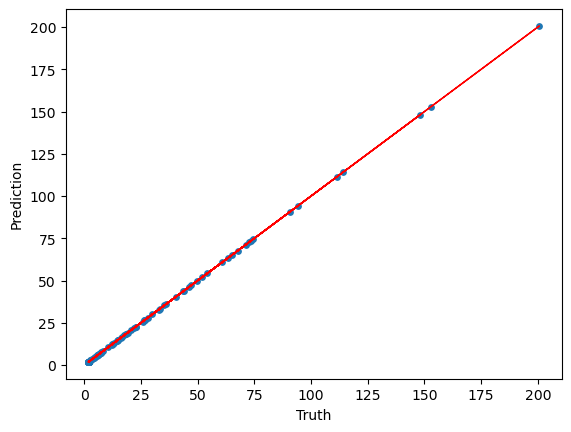

In [7]:
plt.scatter(y, p_1,s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [8]:
from IPython.display import Markdown as md
md(f"The model has this equation as output: ${l[0]}$")

The model has this equation as output: $x_{0}^{2} + 2.56 \cos{\left(x_{0} \right)} - 0.506$

## 2. Gaussian noise


In [9]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                           26.42779   
	1        2.524966e+00                                          (x0 * x0)   
	2        1.029007e-02                           ((x0 * x0) + -0.4176687)   
	3  >>>>  2.955690e-01                              (cos(x0) + (x0 * x0))   
	4        1.366115e-01                ((x0 * x0) + (2.6707468 * cos(x0)))   
	5        1.622036e-02  ((x0 * x0) + (-0.38938785 + (cos(x0) * 2.66306...   
	6        2.174495e-07  (((x0 * x0) + (cos(x0) * 2.6630268)) + cos(1.9...   
	7        2.544768e-02  ((((x0 * x0) * 1.009875) + -0.8409735) + (2.67...   
	8        3.581645e-04  ((cos(x0) * 2.6027856) + ((x0 * x0) + (sin(exp...   
	
	          loss  complexity  
	0  1336.130600           1  
	1     8.564294           3  
	2     8.389841           5  
	3     6.242948           6  
	4     4.750403           8  
	5     4.598770          10  
	6     4.598769          11  
	7     4.483217          12  
	8     4.478403          15  
]

In [10]:
p_2 = model.predict(X)
l_2 = model.latex()
p.append(p_2), l.append(l_2)

(None, None)

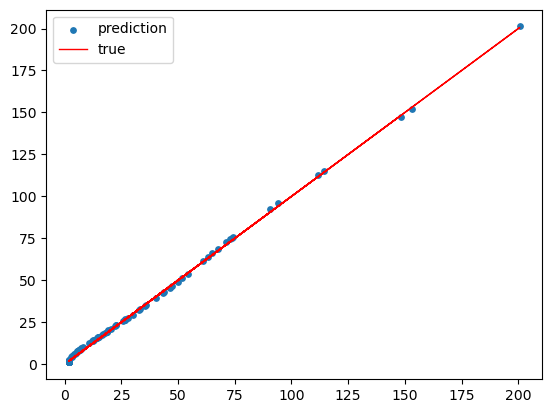

In [11]:
plt.scatter(y, p_2,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [12]:
md(f"The model has this equation as output: ${l[1]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{0} \right)}$

## 3. Uniform noise

In [13]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          27.343327   
	1        2.890546                                          (x0 * x0)   
	2        0.031906                           ((x0 * x0) + 0.49741694)   
	3        0.714628                              (cos(x0) + (x0 * x0))   
	4        0.567379                 ((x0 * x0) + (2.528642 * cos(x0)))   
	5  >>>>  0.261674  (((x0 * x0) + 0.70367277) + (cos(x0) * 2.47838...   
	6        0.085433  ((x0 * x0) + ((sin(cos(x0)) + 0.18317635) * 2....   
	7        0.008535  ((x0 * x0) + ((cos(x0) * (log(5.3577065) + 0.8...   
	
	          loss  complexity  
	0  1299.966700           1  
	1     4.010841           3  
	2     3.762899           5  
	3     1.841466           6  
	4     0.592031           8  
	5     0.350798          10  
	6     0.322073          11  
	7     0.316622          13  
]

In [14]:
p_3 = model.predict(X)
l_3 = model.latex()
p.append(p_3), l.append(l_3)

(None, None)

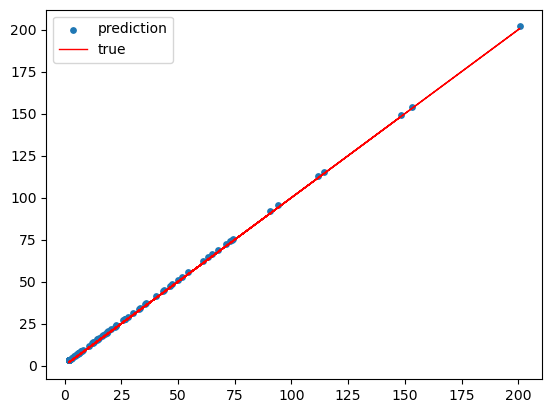

In [15]:
plt.scatter(y, p_3,s=15, label='prediction')
plt.plot(y,y, color='r', lw=1, label='true')
plt.legend()
plt.show()

In [16]:
md(f"The model has this equation as output: ${l[2]}$")

The model has this equation as output: $x_{0}^{2} + 2.48 \cos{\left(x_{0} \right)} + 0.704$

## Comparison beetween ideal and noised

Gaussian

I compute the diferences between ideal and noised data, and later I used the discovered formulas to do the same:

In [17]:
d_1 = y-n 
d_2 = p_1-p_2

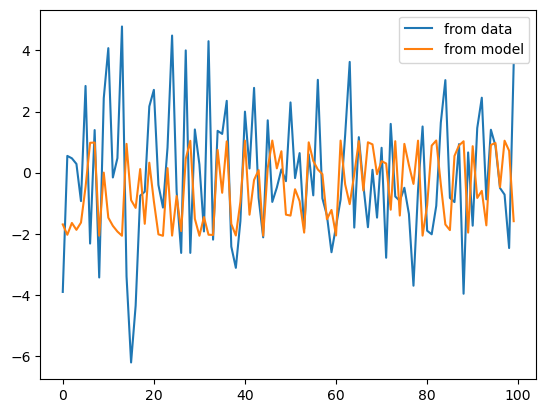

In [18]:
plt.plot(d_1, label='from data')
plt.plot(d_2, label='from model')
plt.legend()

seems that the model reduces the discrepances between ideal data and gaussian-noised data: I think that's fine because we find in both cases two formulas very similar. ($ x^2+a\cdot cos(x)+ b$, where  $a, b \in \mathbb{R}$)


Uniform

In [19]:
r_1 = y-u
r_2 = p_1-p_3

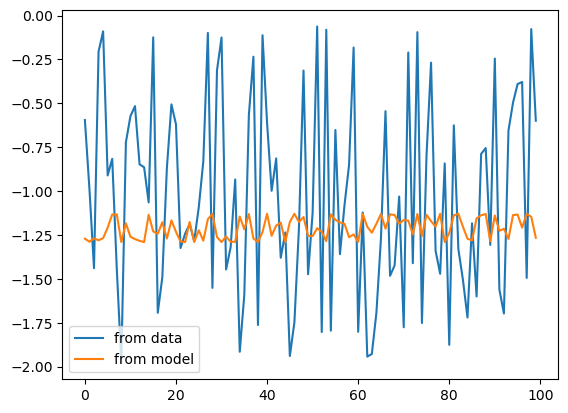

In [20]:
plt.plot(r_1, label='from data')
plt.plot(r_2, label='from model')
plt.legend()

## Tryhard #1: using only 50 points

In [21]:
X = 5 * np.random.randn(50,1)
y = 2.5382 * np.cos(X) + X ** 2 - 0.5 
n = y + a*np.random.randn(50,1)
u = y + a*np.random.rand(50,1)

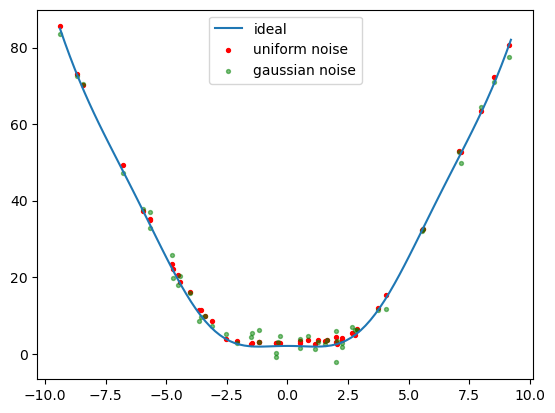

In [22]:
x = np.arange(np.min(X),np.max(X)+0.2, 0.2)
g = 2.5382 * np.cos(x) + x ** 2 - 0.5 
plt.plot(x,g, label='ideal')
plt.scatter(X,u, label='uniform noise', color='r', s=8)
plt.scatter(X,n, label='gaussian noise', color='green', s=8, alpha=0.5)
plt.legend()

Ideal

In [23]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          19.649069   
	1         2.565689                                          (x0 * x0)   
	2         0.064470                           ((x0 * x0) + -0.6502807)   
	3         0.731973                              (cos(x0) + (x0 * x0))   
	4         0.892133                ((x0 * x0) + (cos(x0) * 2.5998242))   
	5         3.049472  (((x0 * x0) + (cos(x0) * 2.5381987)) + -0.5236...   
	6  >>>>  16.383615  (((x0 * x0) + (cos(x0) * 2.5381987)) + sin(-0....   
	
	           loss  complexity  
	0  5.916633e+02           1  
	1  3.495788e+00           3  
	2  3.072893e+00           5  
	3  1.477935e+00           6  
	4  2.481752e-01           8  
	5  5.572126e-04          10  
	6  4.272749e-11          11  
]

In [24]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [25]:
md(f"The model has this equation as output: ${l[3]}$")

The model has this equation as output: $x_{0}^{2} + 2.54 \cos{\left(x_{0} \right)} - 0.500$

Gaussian

In [26]:
model.fit(X, n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          20.094213   
	1         2.164996                                          (x0 * x0)   
	2         0.033856                           ((0.97792345 * x0) * x0)   
	3         0.289487                              (cos(x0) + (x0 * x0))   
	4   >>>>  0.189064                 ((x0 * x0) + (cos(x0) * 2.860878))   
	5         0.007272            ((x0 * x0) + (sin(cos(x0)) * 3.236518))   
	6         0.001735  ((x0 * x0) + (sin(sin(cos(x0))) * exp(1.293427...   
	7         0.016916  (((cos(-0.110110246) * x0) * x0) + (cos(x0) * ...   
	8         0.005739  ((x0 * x0) + (cos(x0) * (exp(cos(cos(-1.159550...   
	9         0.034108  (((x0 * x0) + (cos(x0) * 3.236518)) + sin(sin(...   
	10        0.001995  (((x0 * x0) + (sin(cos(x0)) * (3.236518 + exp(...   
	11        0.004516  (((x0 * x0) + (sin(cos(x0)) * (3.236518 + exp(...   
	12        0.007536  (((x0 * x0) + (sin(cos(x0)) * 3.236518)) + sin...   
	
	          loss  complexity  
	0   573.614750           1  
	1     7.553154           3  
	2     7.058644           5  
	3     5.284439           6  
	4     3.620594           8  
	5     3.594360           9  
	6     3.581912          11  
	7     3.521831          12  
	8     3.461709          15  
	9     3.345628          16  
	10    3.332305          18  
	11    3.317289          19  
	12    3.292385          20  
]

In [27]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)

(None, None)

In [28]:
md(f"The model has this equation as output: ${l[4]}$")

The model has this equation as output: $x_{0}^{2} + 2.86 \cos{\left(x_{0} \right)}$

uniform

In [29]:
model.fit(X, u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                          20.598305   
	1         5.111016e-08                                     exp(3.0251184)   
	2         5.118250e+00                                          (x0 * x0)   
	3         1.269834e-02                           ((x0 * x0) + 0.29685408)   
	4         7.657216e-01                              (cos(x0) + (x0 * x0))   
	5         5.661284e-01                 ((x0 * x0) + (2.498937 * cos(x0)))   
	6         2.086423e-03           ((x0 * x0) + (sin(cos(x0)) * 2.8181896))   
	7   >>>>  4.855478e-01  (((x0 * x0) + (cos(x0) * 2.5199625)) + 0.4211871)   
	8         8.464597e-04  (((cos(x0) * 2.5655043) + (x0 * x0)) + cos(1.1...   
	9         2.594609e-03  (((cos(x0) * 2.5655043) + (x0 * x0)) + sin(exp...   
	10        8.889687e-05  ((cos(x0) * 2.5655043) + ((x0 * x0) + sin(sin(...   
	11        6.315114e-02  ((x0 * x0) + ((cos(x0 + -0.0779806) * (1.78783...   
	
	          loss  complexity  
	0   586.967500           1  
	1   586.967470           2  
	2     3.513875           3  
	3     3.425757           5  
	4     1.592971           6  
	5     0.513423           8  
	6     0.512353           9  
	7     0.315281          10  
	8     0.315015          11  
	9     0.314198          12  
	10    0.314170          13  
	11    0.294944          14  
]

In [30]:
l_4 = model.latex()
p_4 = model.predict(X)
p.append(p_4), l.append(l_4)
md(f"The model has this equation as output: ${l[5]}$")

The model has this equation as output: $x_{0}^{2} + 2.52 \cos{\left(x_{0} \right)} + 0.421$

It seems that the gaussian noise has a greater disturbance on the data, in fact the expression that I found is slightly different from the ideal one. The model suffers a bit with gaussian noise, while the model is reliable with the uniform noise

## Tryhard: 5(or 2) variables



In [31]:
X = 5 * np.random.randn(100, 2)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,1]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 2 features each. The relation we want to investigate is

$$
2.5382 cos(x_1)+x_0^2-0.5
$$

## 1. Ideal

In [32]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          20.677652   
	1        2.911544                                          (x0 * x0)   
	2        0.058115                          ((x0 * x0) + -0.67708236)   
	3        0.762656                              ((x0 * x0) + cos(x1))   
	4        0.966986                ((x0 * x0) + (cos(x1) * 2.5278444))   
	5        0.460368  ((x0 * x0) + ((cos(x1) + -0.07310576) * 2.5278...   
	6        1.169662  (((x0 * x0) + sin(-2.3984113)) + (cos(x1) * 2....   
	7        0.235320  ((((x0 * x0) + sin(-2.3984113)) + (cos(x1) * 2...   
	8        0.005552  ((((x0 * x0) + cos(x1)) + cos(x1)) + sin(cos(x...   
	9  >>>>  0.574344  ((((x0 * x0) + cos(x1)) + cos(x1)) + sin(sin(c...   
	
	          loss  complexity  
	0  1412.034700           1  
	1     4.177443           3  
	2     3.719056           5  
	3     1.734665           6  
	4     0.250785           8  
	5     0.099869          10  
	6     0.031007          11  
	7     0.015306          14  
	8     0.015221          15  
	9     0.008571          16  
]

In [33]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[6]}$")

The model has this equation as output: $x_{0}^{2} + \sin{\left(\sin{\left(\cos{\left(x_{1} \right)} \right)} - 0.760 \right)} + 2 \cos{\left(x_{1} \right)}$

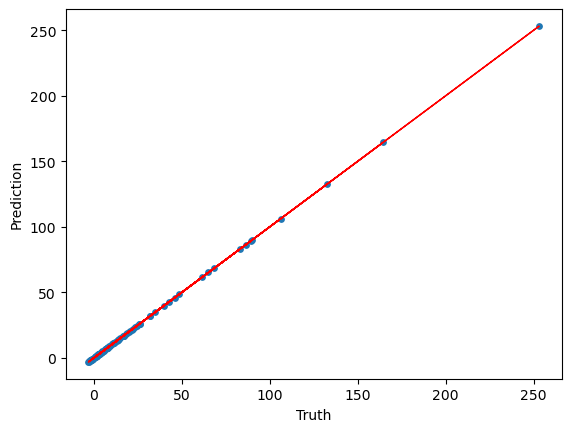

In [34]:
plt.scatter(y, p[6],s=15)
plt.plot(y,y, color='r', lw=1)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

## 2. Gaussian

In [35]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          20.817854   
	1         2.471780                                          (x0 * x0)   
	2         0.014420                          ((x0 * x0) + -0.53676444)   
	3   >>>>  0.284048                              ((x0 * x0) + cos(x1))   
	4         0.149180                ((x0 * x0) + (cos(x1) * 2.5278444))   
	5         0.000226            ((x0 * x0) + (cos(x1) * exp(1.146276)))   
	6         0.023451  ((x0 * x0) + ((cos(x1) + -0.12873776) * 2.5278...   
	7         0.002322  ((x0 * x0) + (((cos(x1) * 1.146276) + -0.17700...   
	8         0.000098  ((x0 * x0) + (((cos(x1) * 1.146276) + sin(-0.1...   
	9         0.003177  ((((x0 + 0.03311906) * x0) + (exp(cos(-0.30153...   
	10        0.018295  ((((x0 * x0) + cos(x1)) + cos(cos(x1) + x1)) +...   
	11        0.003306  ((((x0 * x0) + cos(x1)) + cos(x1 + sin(cos(x1)...   
	12        0.026218  ((((x0 * x0) + cos(x1)) + cos(cos(x1 + -0.6043...   
	13        0.001631  ((((x0 * x0) + cos(x1)) + cos(cos(x1 + -0.6043...   
	
	           loss  complexity  
	0   1421.700200           1  
	1     10.135547           3  
	2      9.847419           5  
	3      7.412454           6  
	4      5.500299           8  
	5      5.499056           9  
	6      5.371597          10  
	7      5.346713          12  
	8      5.346191          13  
	9      5.329235          14  
	10     5.232621          15  
	11     5.215352          16  
	12     5.080394          17  
	13     5.063847          19  
]

In [36]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[7]}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{1} \right)}$

## 3. Uniform

In [37]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           21.64735   
	1         2.917872                                          (x0 * x0)   
	2         0.010675                           ((x0 * x0) + 0.29497907)   
	3         0.795579                              ((x0 * x0) + cos(x1))   
	4         0.594810                ((x0 * x0) + (cos(x1) * 2.5278444))   
	5   >>>>  0.255895  ((x0 * x0) + ((cos(x1) + 0.19238232) * 2.52784...   
	6         0.000242  ((x0 * x0) + ((cos(x1) + sin(0.19238232)) * 2....   
	7         0.000413  ((x0 * x0) + ((cos(x1) * 2.5278444) + (0.26595...   
	8         0.002360  ((((x0 * x0) + cos(sin(x1))) + -0.33236647) + ...   
	9         0.031147  ((((x0 * x0) + cos(sin(x1))) + -0.33236647) + ...   
	10        0.000046  ((((x0 * x0) + cos(sin(x1))) + sin(-0.33236647...   
	11        0.000378  ((((x0 * x0) + cos(sin(x1))) + -0.33236647) + ...   
	12        0.000142  ((((x0 * x0) + cos(sin(x1))) + -0.33236647) + ...   
	13        0.000050  ((((x0 * x0) + cos(sin(x1))) + -0.33236647) + ...   
	
	           loss  complexity  
	0   1410.809000           1  
	1      4.121327           3  
	2      4.034269           5  
	3      1.820745           6  
	4      0.554120           8  
	5      0.332151          10  
	6      0.332071          11  
	7      0.331934          12  
	8      0.329592          15  
	9      0.319485          16  
	10     0.319470          17  
	11     0.319349          18  
	12     0.319304          19  
	13     0.319288          20  
]

In [38]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[8]}$")

The model has this equation as output: $x_{0}^{2} + 2.53 \cos{\left(x_{1} \right)} + 0.486$

## 5 (3 fake) variables

In [39]:
X = 5 * np.random.randn(100, 5)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
u = y + a*np.random.rand(100)

we have created a dataset with 100 points with 5 features each. The relation we want to investigate is

$$
2.5382 cos(x_3)+x_0^2-0.5
$$

### Ideal

In [40]:
model.fit(X,y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                          23.194605   
	1        2.915399                                          (x0 * x0)   
	2        0.067163                           ((x0 * x0) + -0.6839651)   
	3        0.729459                              ((x0 * x0) + cos(x3))   
	4        0.770079                ((x0 * x0) + (cos(x3) * 2.1918828))   
	5        0.169459          ((x0 * x0) + (cos(x3) * exp(0.85097384)))   
	6        1.520002  (((x0 * x0) + -0.48623234) + (cos(x3) * 2.1918...   
	7  >>>>  2.176390  (((x0 * x0) + -0.48623234) + (cos(x3) * (2.191...   
	
	          loss  complexity  
	0  1267.771900           1  
	1     3.721841           3  
	2     3.254027           5  
	3     1.568993           6  
	4     0.336309           8  
	5     0.283886           9  
	6     0.062089          10  
	7     0.000799          12  
]

In [41]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[9]}$")

The model has this equation as output: $x_{0}^{2} + 2.51 \cos{\left(x_{3} \right)} - 0.486$

### Gaussian noise


In [42]:
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                           22.96864   
	1        2.363149                                          (x0 * x0)   
	2        0.038207                          ((x0 * x0) + -0.91022813)   
	3        0.247848                              ((x0 * x0) + cos(x3))   
	4  >>>>  0.262688                 ((x0 * x0) + (cos(x3) * 3.461406))   
	5        0.047307   (((x0 * x0) + -0.659212) + (cos(x3) * 3.461406))   
	6        0.002184  (((x0 * x0) + (sin(x0 * x0) + -0.99601275)) + ...   
	7        0.005080  (((x0 * x0) + (sin(x0 * x0) + sin(-0.99601275)...   
	
	          loss  complexity  
	0  1270.941800           1  
	1    11.259539           3  
	2    10.431194           5  
	3     8.141324           6  
	4     4.814229           8  
	5     4.379616          10  
	6     4.303766          18  
	7     4.281958          19  
]

In [43]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[10]}$")

The model has this equation as output: $x_{0}^{2} + 3.46 \cos{\left(x_{3} \right)}$

### Uniform noise

In [44]:
model.fit(X,u)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                          24.202932   
	1         7.878610e-08                                     exp(3.1865118)   
	2         5.850804e+00                                          (x0 * x0)   
	3         1.729735e-02                            ((x0 * 1.0082573) * x0)   
	4         7.699973e-01                              ((x0 * x0) + cos(x3))   
	5         5.733556e-01                ((x0 * x0) + (cos(x3) * 2.4778788))   
	6         1.488866e-01  ((x0 * x0) + ((cos(x3) * 2.4778788) + 0.856411...   
	7   >>>>  1.599321e-01  ((x0 * x0) + ((cos(x3) * 2.4778788) + sin(exp(...   
	8         4.334603e-02  (((x0 * x0) + (exp(cos(-0.34084114)) * cos(x3)...   
	9         2.201961e-02  (((x0 * x0) + ((exp(cos(-0.30038556)) * 0.9721...   
	10        2.021352e-04  (((x0 * x0) + ((exp(cos(sin(-0.30038556))) * 0...   
	11        2.136630e-03  (((x0 * x0) + ((exp(cos(-0.30038556)) * 0.9721...   
	12        4.369880e-03  (((x0 * x0) + ((exp(cos(-0.30038556)) * 0.9721...   
	13        3.961233e-04  (((x0 * x0) + (((exp(cos(-0.30038556)) * 0.972...   
	14        1.007856e-04  (((x0 * x0) + (((exp(cos(-0.30038556)) * 0.972...   
	
	           loss  complexity  
	0   1269.259400           1  
	1   1269.259300           2  
	2      3.652401           3  
	3      3.528208           5  
	4      1.633611           6  
	5      0.518965           8  
	6      0.385316          10  
	7      0.279835          12  
	8      0.267964          13  
	9      0.262128          14  
	10     0.262075          15  
	11     0.261516          16  
	12     0.260376          17  
	13     0.260169          19  
	14     0.260143          20  
]

In [45]:
l_5 = model.latex()
p_5 = model.predict(X)
p.append(p_5), l.append(l_5)
md(f"The model has this equation as output: ${l[11]}$")

The model has this equation as output: $x_{0}^{2} + 2.48 \cos{\left(x_{3} \right)} + 0.637$

It seems that the model fails with gaussian noise, both with one variable and with two variables. The model is anyway solid with uniform noise. 

Now we can try to increase the number of data, to see if the model can recover the expression that we want.

### fix #1: increasing the points

In [46]:
X = 5 * np.random.randn(1000, 5)
a = 2 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(1000)
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                          25.121565   
	1         2.571967e+00                                          (x0 * x0)   
	2         1.072439e-02                          ((x0 * x0) + -0.40279126)   
	3   >>>>  3.077016e-01                              ((x0 * x0) + cos(x3))   
	4         1.416767e-01                 ((x0 * x0) + (cos(x3) * 2.649809))   
	5         3.371725e-02  ((x0 * x0) + ((cos(x3) * 2.4778788) + -0.55398...   
	6         4.758103e-03  ((x0 * x0) + ((cos(x3) * 2.834336) + log(0.585...   
	7         1.663187e-03  ((x0 * x0) + ((cos(x3) * (2.4778788 + 0.290411...   
	8         3.046749e-05  ((x0 * x0) + ((cos(x3) * ((2.4778788 + cos(1.5...   
	9         1.179734e-04  (((((x0 * x0) + (cos(x3) * 2.7078826)) + (exp(...   
	10        3.120167e-07  (((((x0 * x0) + (cos(x3) * 2.7078826)) + (exp(...   
	
	           loss  complexity  
	0   1310.009000           1  
	1      7.643499           3  
	2      7.481301           5  
	3      5.499764           6  
	4      4.142716           8  
	5      3.872565          10  
	6      3.854183          11  
	7      3.847778          12  
	8      3.847309          16  
	9      3.845948          19  
	10     3.845947          20  
]

In [47]:
md(f"The model has this equation as output: ${model.latex()}$")

The model has this equation as output: $x_{0}^{2} + \cos{\left(x_{3} \right)}$

It seems that the problem persist: perhaps the problem is in the factor of amplification of the noise.

### fix #2: decreasing the noise

In [48]:
X = 5 * np.random.randn(100, 5)
a = 0.5 #weight for noise
y = 2.5382 * np.cos(X[:,3]) + X[:,0] ** 2 - 0.5
n = y + a*np.random.randn(100)
model.fit(X,n)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                          27.397612   
	1         3.061784e+00                                          (x0 * x0)   
	2         3.226743e-02                          ((x0 * x0) + -0.46582186)   
	3         7.694342e-01                              ((x0 * x0) + cos(x3))   
	4         5.839223e-01                ((x0 * x0) + (cos(x3) * 2.4778788))   
	5   >>>>  3.803072e-01  (((x0 * x0) + (cos(x3) * 2.4778788)) + -0.5231...   
	6         2.372765e-03  (((x0 * x0) + (cos(x3) * 2.4778788)) + sin(-0....   
	7         1.458946e-02  (((x0 + -0.0061652134) * x0) + ((cos(x3) + -0....   
	8         2.679999e-04  (((x0 + -0.0061652134) * x0) + ((cos(x3) * 2.4...   
	9         2.273781e-03  (((x0 + (-0.0061652134 * 2.4778788)) * x0) + (...   
	10        8.891969e-04  (((x0 + (-0.0061652134 * exp(0.7392383))) * x0...   
	11        1.866735e-07  (((x0 + (sin(-0.0061652134) * exp(0.7392383)))...   
	12        1.306715e-06  (((x0 + (-0.0061652134 * (exp(0.7392383) + -0....   
	
	           loss  complexity  
	0   1585.175200           1  
	1      3.472523           3  
	2      3.255503           5  
	3      1.508193           6  
	4      0.469103           8  
	5      0.219249          10  
	6      0.218730          11  
	7      0.215562          12  
	8      0.215446          14  
	9      0.214469          16  
	10     0.214278          17  
	11     0.214278          18  
	12     0.214278          19  
]

In [49]:
md(f"The model has this equation as output: ${model.latex()}$")

The model has this equation as output: $x_{0}^{2} + 2.48 \cos{\left(x_{3} \right)} - 0.523$

We finally recovered an expression that looks like the ideal one: we can compute the difference between these two quantities.

y is the dataset generated, and f(x) is the prediction from the model with gaussian noise

Text(0, 0.5, '$y-f(x)$')

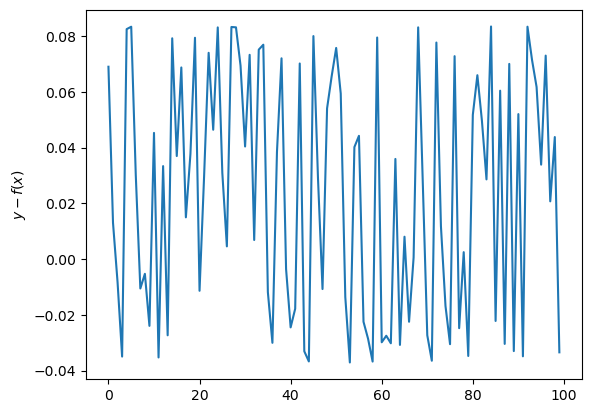

In [50]:
plt.plot(y-model.predict(X))
plt.ylabel(r'$y-f(x)$')

Let's evaluate the percentage error:

Text(0, 0.5, 'percentage error')

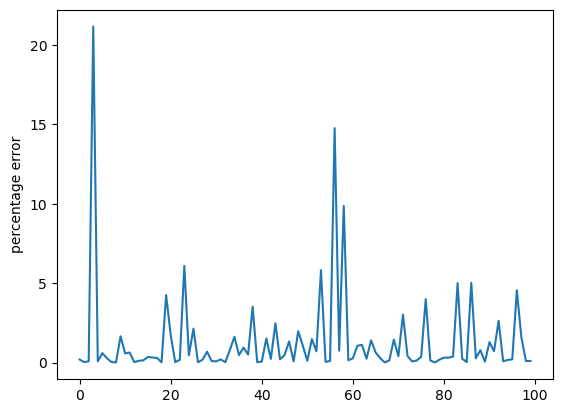

In [51]:
pc_err = 100*np.abs((y-model.predict(X))/y)
err_mean = np.mean(pc_err)
plt.plot(pc_err)
plt.ylabel('percentage error')

there are few critical points, probably these are the ones near zero, where y is small and so the noise is of the same order or pheraps of an higher order of magnitude of y.

In [52]:
md(f'The mean value of the percentage error is: {err_mean}')

The mean value of the percentage error is: 1.3264755724560897

# Nice example: tying to interpolate the Debye model

The Debye model for specific heat has this integral form:

$$ c_v(T) = 9R\bigg(\frac{T}{T_D}\bigg)^3 \int_{0}^{\frac{T_D}{T}}\frac{x^4e^x}{(e^x-1)^2}dx$$

where

$$ x = \frac{hv_sn}{2Lk_bT} \quad T_D=\frac{hv_s}{2K_b}\sqrt[3]{\frac{6}{\pi}\frac{N}{V}}$$

if we consider a cube made by iron (L=$1\ m$), we know that $T_D=464\ K$ and $n=2$ because iron is a BCC solid.

/var/folders/b8/p92pmfdj18923_7h6_3fj7nc0000gn/T/ipykernel_789/2022150869.py:6: RuntimeWarning: overflow encountered in scalar power
  return x**4 *np.exp(x)/ (np.exp(x) - 1)**2


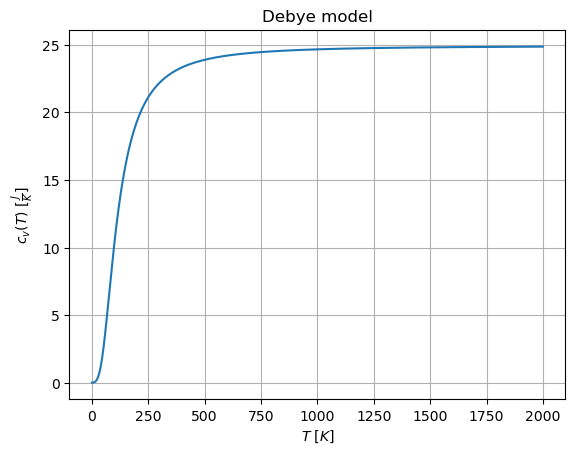

In [74]:
import numpy as np
from scipy.integrate import quad

T_D = 464
def integrand(x):
    return x**4 *np.exp(x)/ (np.exp(x) - 1)**2

T = np.arange(1, 2000, 0.5)  

def calculate_debye_integral(T):
    result, _ = quad(integrand, 0, T_D/T)
    return result

results = np.vectorize(calculate_debye_integral)(T)
C_v = results*9*8.314*(T/T_D)**3

plt.plot(T,C_v)
plt.xlabel(r"$T\ [K]$")
plt.ylabel(r"$c_v(T)\ [\frac{J}{K}]$")
plt.title("Debye model")
plt.grid(True)
plt.show()


In [54]:
C_v1 = C_v.reshape(-1, 1)
T1 = T.reshape(-1, 1)

 "slurm", "pbs", "lsf", "sge", "qrsh", "scyld", or "htc".

In [111]:
debyemodel = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*",'-','/'],
    unary_operators=[
        "cos",
        "sin",
        "exp",
        "log",
        "inv(x) = 1/x",
        'sinh',
        'cosh',
        'erf',
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
    turbo=True,    
    cluster_manager="scyld",
    multithreading=True,
)

debyemodel.fit(T1, C_v1)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Expressions evaluated per second: 5.650e+04
Head worker occupation: 2.8%
Progress: 104 / 600 total iterations (17.333%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.491e+01  7.648e-08  22.847431
3           2.491e+01  2.975e-08  (19.342093 - -3.5052106)
4           2.480e+01  4.407e-03  (22.847431 - inv(x0))
6           1.683e+01  1.937e-01  log(x0 * (x0 * x0))
8           7.614e+00  3.967e-01  (log((x0 * x0) * x0) + 3.0362332)
9           2.170e+00  1.255e+00  sinh(exp(erf(log(x0 * 0.01441745))) - -1.1324935)
10          2.170e+00  1.353e-04  sinh(exp(erf(log(x0 * sinh(0.01441745)))) - -1.1324935)
12          3.718e-01  8.821e-01  cosh(exp(erf((log(x0) + -1.5475438) + inv(-0.4049006))) - -1.1...
                                  756867)
13          3.288e-01  1.227e-01  cosh(exp(erf((log(x0) + -1.2424042) - sinh(cosh(-1.1706129))))...
                 

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          22.847305   
	1         0.447960                               (log(x0) * 3.481486)   
	2         0.078048                 ((log(x0) * 4.451199) - 6.5471373)   
	3         0.311958       sinh(erf(log(x0 * 0.01696597)) - -2.8441582)   
	4         2.312618  sinh(exp(erf(log(x0 * 0.016993988))) - -1.1761...   
	5         0.122582  sinh(exp(erf(log(x0 * 0.020596776) * 0.8140682...   
	6         0.017441  sinh(exp(erf(log(x0 * 0.020596776) * cos(-0.60...   
	7         0.007391  sinh(exp(erf(log((x0 + -0.93155503) * 0.020596...   
	8   >>>>  0.295314  sinh(exp(erf((log(x0) + sinh(inv(-0.5116284)))...   
	9         0.204121  sinh(exp(erf((log(x0) + sinh(inv(-0.5116284)))...   
	10        0.002699  sinh(exp(erf((log(x0) + sinh(inv(-0.5116284)))...   
	
	         loss  complexity  
	0   24.905958           1  
	1    6.496258           4  
	2    5.557404           6  
	3    2.977891           8  
	4    0.294816           9  
	5    0.230716          11  
	6    0.226727          12  
	7    0.221755          15  
	8    0.165052          16  
	9    0.134577          17  
	10   0.133492          20  
]

In [112]:
md(f"The model has this equation as output: ${debyemodel.latex()}$")

The model has this equation as output: $\sinh{\left(1.18 + e^{- \operatorname{erf}{\left(- \log{\left(x_{0} \right)} + \cos{\left(\sin{\left(\log{\left(x_{0} \right)} \right)} \right)} + 3.46 \right)}} \right)}$

# Implementing power functions